<a href="https://colab.research.google.com/github/Zevas02/Inteligencia-Artificial/blob/main/Actividades/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Actividad 6 Sebastian Cordero Leija 1915025 N4


In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 1s 0us/step


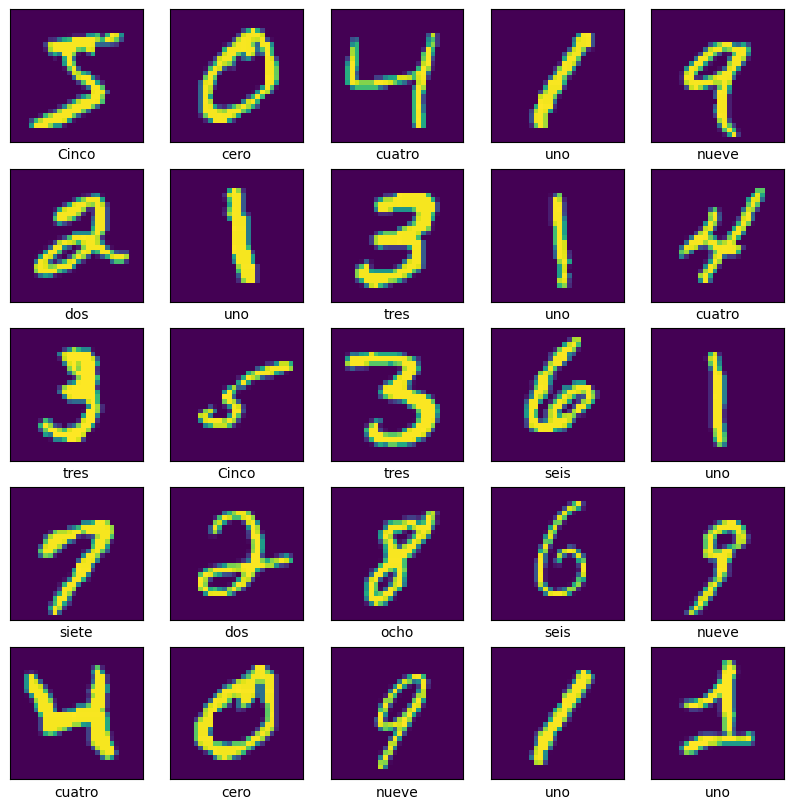

In [4]:
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'Cinco', 'seis', 'siete', 'ocho', 'nueve']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0410 - val_accuracy: 0.9887
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0309 - val_accuracy: 0.9917
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.0385 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0322 - val_accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0298 - val_accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0380 - val_accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.0384 -

313/313 - 4s - loss: 0.0458 - accuracy: 0.9917 - 4s/epoch - 13ms/step


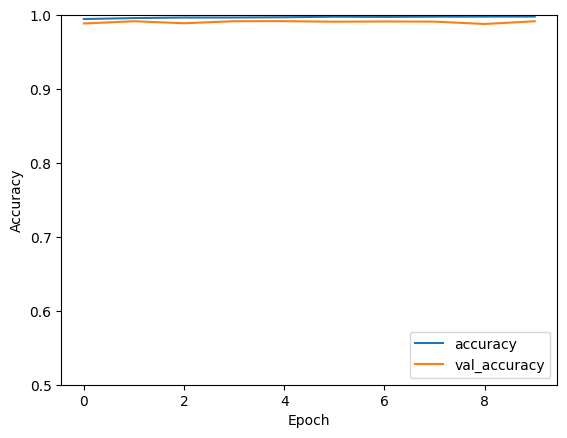

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.9916999936103821


In [ ]:
#¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
#10 epocas

#¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?
#mejor, ya que este dio un porcentaje de 0.9917